# Random Forest Classifier & Hyperparameter Tuning

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV 

In [2]:
iris = sns.load_dataset('iris')

### Wrangling

In [3]:
x = iris.drop('species', axis=1)
y = iris['species']

### Train-Test-Split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

### Initial Random Forest Model

In [5]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

### Evaluate Model Fit

In [6]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# Hyperparameter Tuning

#### Find the best number of Estimators

In [ ]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

#### Tuning the Remaining 3 Features: ((max features, max depth, min samples)

In [7]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [8]:
rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

#### Time to Fit

In [9]:
rf_random.fit(x_train, y_train)

C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClas

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

#### find out which hyperparameter produced the best accuracy

In [10]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10}

In [11]:
# run one last random forest that has these parameters from above:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=2, max_features=None, max_depth=100)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=100, max_features=None, min_samples_leaf=2,
                       n_estimators=10)

In [12]:
# get the details! confusion matrix and classification report
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 11  2]
 [ 0  1 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.85      0.88        13
   virginica       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



# Feature Importance - which variable (aka feature) is most important to the prediction of y?

In [13]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

sepal_length    0.008381
sepal_width     0.000979
petal_length    0.593612
petal_width     0.397028
dtype: float64

In [14]:
# to see these values listed from largest (better feature performance) to smallest:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

petal_length    0.593612
petal_width     0.397028
sepal_length    0.008381
sepal_width     0.000979
dtype: float64


<AxesSubplot:>

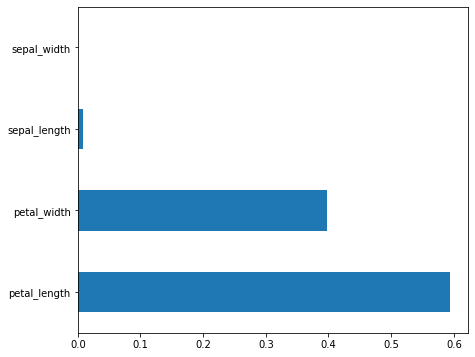

In [15]:
# to view this graphically
feature_importances.plot(kind='barh', figsize=(7,6))